In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Import Library**

In [2]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install --ignore-installed Pillow==9.0.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Pillow-9.0.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [59]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.bin.gz

--2022-06-03 08:47:08--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4507049071 (4.2G) [application/octet-stream]
Saving to: ‘cc.id.300.bin.gz’

cc.id.300.bin.gz    100%[===================>]   4.20G  38.8MB/s    in 1m 54s  

2022-06-03 08:49:03 (37.7 MB/s) - ‘cc.id.300.bin.gz’ saved [4507049071/4507049071]



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pytesseract
from pytesseract import Output
from PIL import Image

In [87]:
import io
import time

from datetime import timedelta

import logging
logging.basicConfig(level=logging.INFO)
import gensim

from gensim.models.wrappers import FastText
import re

#**Read Image**

In [211]:
test = cv2.imread("/content/drive/MyDrive/Bangkit/sample_ktp.png")
test.shape

(798, 1226, 3)

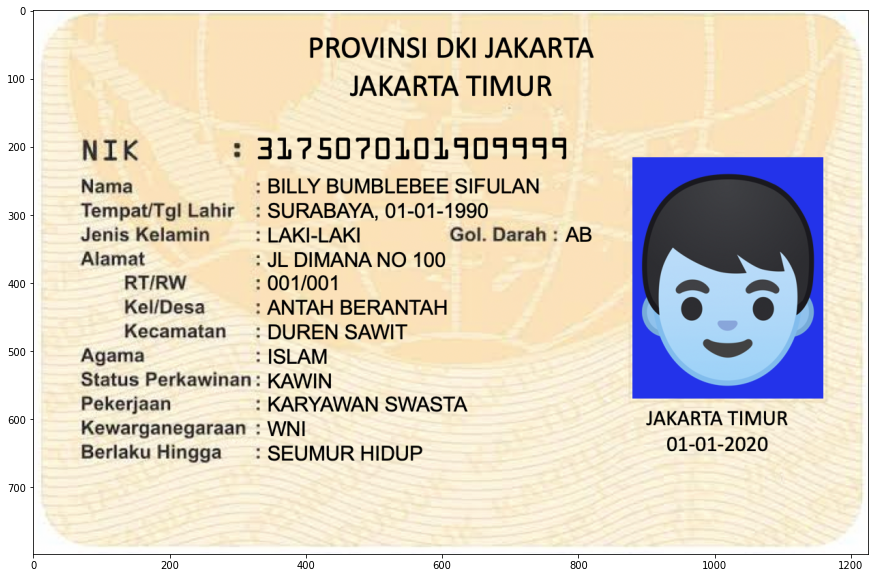

In [212]:
image = cv2.imread("/content/drive/MyDrive/Bangkit/sample_ktp.png")
plt.figure(figsize = (40,10))
plt.imshow(image)

In [213]:
image.shape

(798, 1226, 3)

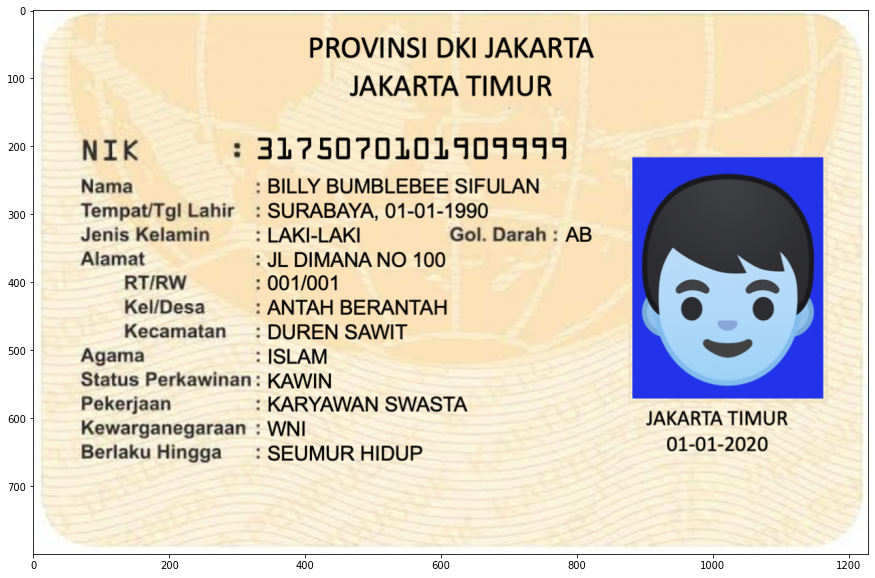

In [214]:
r = 800 / image.shape[0]
dim = (int(image.shape[1] * r), 800)

image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt.figure(figsize = (40,10))
plt.imshow(image)

In [215]:
image.shape

(800, 1229, 3)

#**Pre-Processing Image**

1. Convert image to 1D

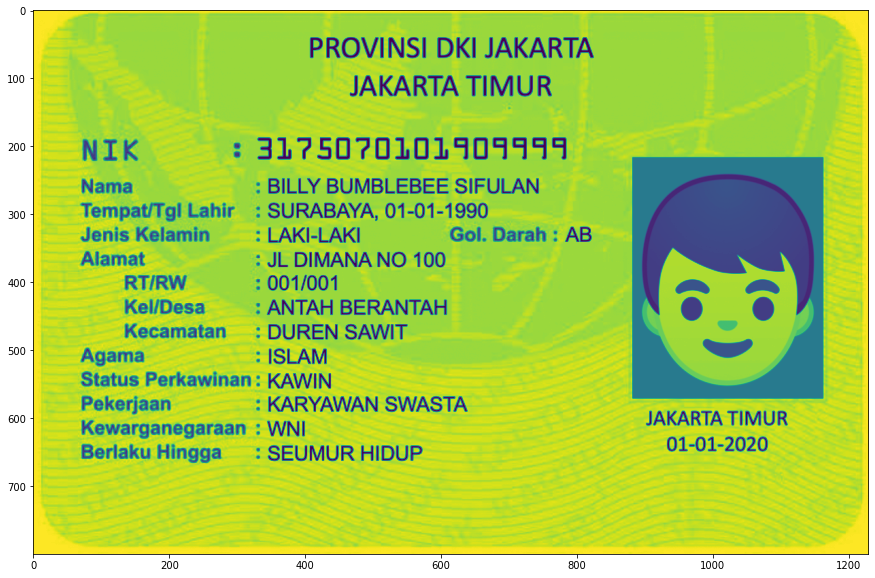

In [216]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (40,10))
plt.imshow(gray)

2. Convert into black and white

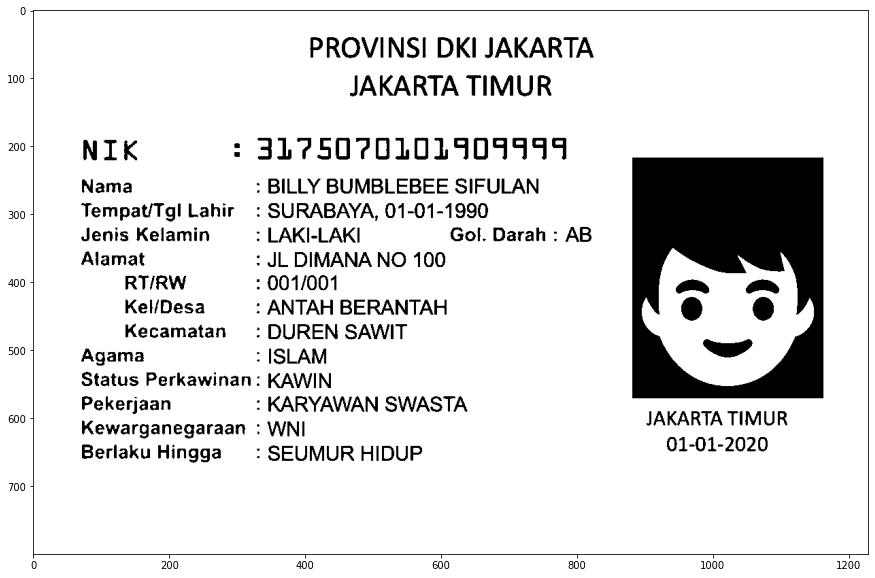

In [217]:
thresh = 127
blackWhite = cv2.threshold(gray,thresh,255,cv2.THRESH_BINARY)[1]
plt.figure(figsize = (40,10))
plt.imshow(blackWhite, cmap="gray")

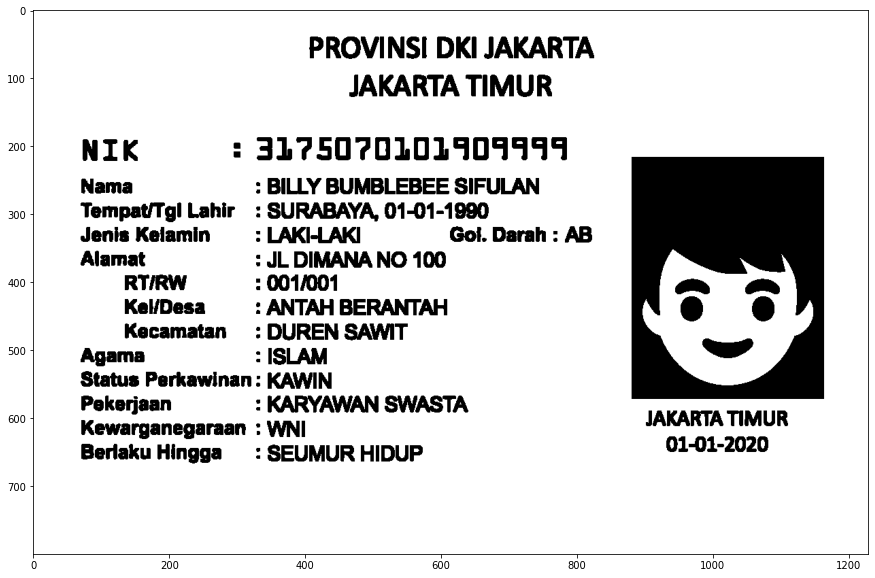

In [218]:
kernel = np.ones((3,3), np.uint8)

img_erosion = cv2.erode(blackWhite, kernel, iterations=1)
plt.figure(figsize = (30,10))
plt.imshow(img_erosion, cmap="gray")

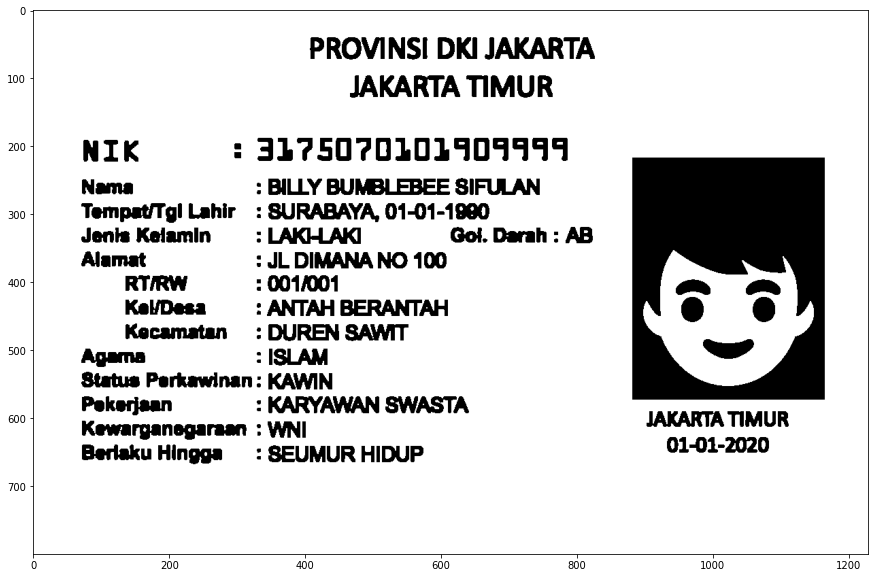

In [219]:
kernel = np.ones((2,2), np.uint8)

img_closing = cv2.morphologyEx(img_erosion, cv2.MORPH_OPEN, kernel, iterations=1)
plt.figure(figsize = (30,10))
plt.imshow(img_closing, cmap="gray")

# **Get text from image**

In [220]:
data = pytesseract.image_to_data(img_closing, output_type='data.frame')
data

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1229,800,-1,NaN
1,2,1,1,0,0,0,407,40,419,33,-1,NaN
2,3,1,1,1,0,0,407,40,419,33,-1,NaN
3,4,1,1,1,1,0,407,40,419,33,-1,NaN
4,5,1,1,1,1,1,407,40,173,33,91,PROVINSI
...,...,...,...,...,...,...,...,...,...,...,...,...
93,3,1,7,1,0,0,72,604,321,28,-1,NaN
94,4,1,7,1,1,0,72,604,321,28,-1,NaN
95,5,1,7,1,1,1,72,604,242,28,88,Kewarganegaraan
96,5,1,7,1,1,2,329,609,6,17,84,:


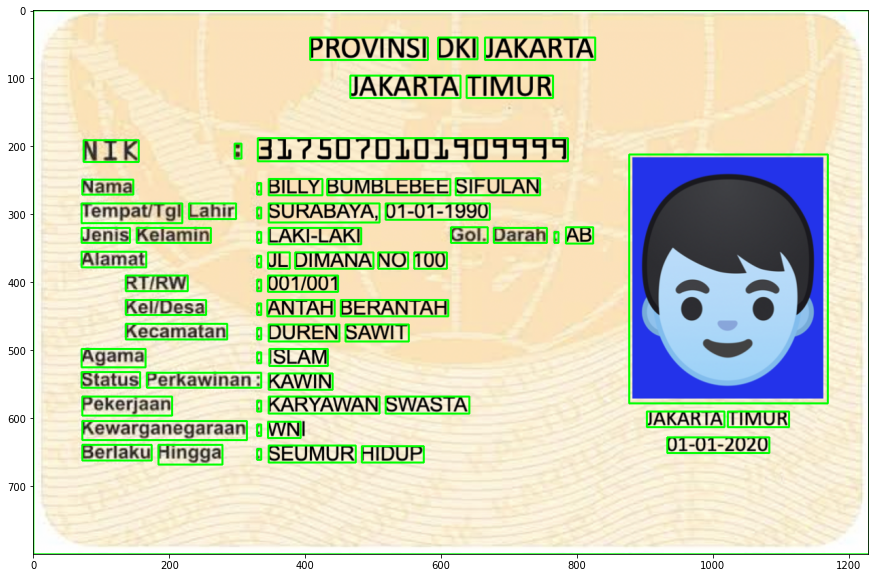

In [221]:
for box in range(len(data)):
  if data["conf"][box] >= 0:
    image = cv2.rectangle(image, (data['left'][box], data['top'][box]), 
                          (data['left'][box]+data['width'][box], data['top'][box]+data['height'][box]), 
                          (0,255,0),2)

plt.figure(figsize = (40,10))
plt.imshow(image)

In [222]:
result = pytesseract.image_to_string(img_erosion)
print(result)

PROVINSI DKI JAKARTA

JAKARTA TIMUR
NIK = 3175070101909995
Nama : BILLY BUMBLEBEE SIFULAN
Tempat/Tgl Lahir : SURABAYA, 01-01-1990
Jenis Kelamin : LAKI-LAKI Gol. Darah : AB
Alamat : JL DIMANA NO 100
RT/RW : 001/001

Kel/Desa : ANTAH BERANTAH
Kecamatan :DUREN SAWIT

 

Agama : ISLAM
Status Perkawinan : KAWIN
Pekerjaan : KARYAWAN SWASTA

JAKARTA TIMUR
Berlaku Hingga =: SEUMUR HIDUP 01-01-2020

Kewarganegaraan : WNI



# **Koreksi Typo**

In [223]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('/content/drive/MyDrive/Bangkit/katadasar.txt').read()))

def P(word, N=sum(WORDS.values())):
    # "Probability of `word`."
    return WORDS[word] / N

def correction(word):
    # "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word):
    # "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words):
    # "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    # "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)] # [('', 'kemarin'), ('k', 'emarin'), ('ke', 'marin'), dst]
    deletes    = [L + R[1:]               for L, R in splits if R] # ['emarin', 'kmarin', 'kearin', dst]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1] # ['ekmarin', 'kmearin', 'keamrin', dst]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters] # ['aemarin', 'bemarin', 'cemarin', dst]
    inserts    = [L + c + R               for L, R in splits for c in letters] # ['akemarin', 'bkemarin', 'ckemarin', dst]
    return set(deletes + transposes + replaces + inserts)

def edits2(word):
    # "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [224]:
lower_string = result.lower()
no_punc_string = re.sub(r'[^\w\s]','', lower_string)
no_wspace_string = no_punc_string.replace('\n', ' ')
no_punc_string = re.sub(r'[^\w\s]','', lower_string)
no_wspace_string = no_punc_string.replace('\n', ' ')
no_wspace_string = re.sub(' +', ' ', no_wspace_string)

In [225]:
list_string = no_wspace_string.split()
new_list = []
for word in list_string:
  new_list.append(correction(word))

In [226]:
list_string

['provinsi',
 'dki',
 'jakarta',
 'jakarta',
 'timur',
 'nik',
 '3175070101909995',
 'nama',
 'billy',
 'bumblebee',
 'sifulan',
 'tempattgl',
 'lahir',
 'surabaya',
 '01011990',
 'jenis',
 'kelamin',
 'lakilaki',
 'gol',
 'darah',
 'ab',
 'alamat',
 'jl',
 'dimana',
 'no',
 '100',
 'rtrw',
 '001001',
 'keldesa',
 'antah',
 'berantah',
 'kecamatan',
 'duren',
 'sawit',
 'agama',
 'islam',
 'status',
 'perkawinan',
 'kawin',
 'pekerjaan',
 'karyawan',
 'swasta',
 'jakarta',
 'timur',
 'berlaku',
 'hingga',
 'seumur',
 'hidup',
 '01012020',
 'kewarganegaraan',
 'wni']

In [227]:
new_list

['provinsi',
 'dki',
 'jakarta',
 'jakarta',
 'timur',
 'nik',
 '3175070101909995',
 'nama',
 'billy',
 'bumblebee',
 'sifulan',
 'tempattgl',
 'lahir',
 'surabaya',
 '01011990',
 'jenis',
 'kelamin',
 'lakilaki',
 'gol',
 'darah',
 'ab',
 'alamat',
 'jl',
 'dimana',
 'o',
 '100',
 'rtrw',
 '001001',
 'keldesa',
 'antah',
 'berantah',
 'kecamatan',
 'duren',
 'kawin',
 'agama',
 'islam',
 'status',
 'perkawinan',
 'kawin',
 'pekerjaan',
 'karyawan',
 'swasta',
 'jakarta',
 'timur',
 'berlaku',
 'hingga',
 'seumur',
 'hidup',
 '01012020',
 'kewarganegaraan',
 'wni']

# **Get value**

In [228]:
def txt_to_list(path):
  # opening the file in read mode
  my_file = open(path, "r")
    
  # reading the file
  data = my_file.read()
    
  # replacing end splitting the text 
  # when newline ('\n') is seen.
  data_into_list = data.split("\n")
  my_file.close()
  return data_into_list

In [241]:
def get_pair(data, prevalue, postvalue):
  pair = {}
  flag = False
  key = ''
  for word in data:
    temp = ''
    keyFlag = False
    # print("true "+word)
    if flag == True and (word in prevalue) or (word in postvalue):
      flag = False
    if flag==False and len(word)>1 and (word in prevalue):
      flag = True
      keyFlag = True
    if keyFlag == True:
      key = word
      print(key)
      pair[key] = ''
      keyFlag = False
      continue
    if flag == True and keyFlag == False:
      # temp = temp + ' ' + word
      print("value : " + word)
      temp = pair[key]
      temp = temp + " " + word
      pair[key] = temp
    if (word in postvalue) or (word in prevalue):
      flag = False
    # if keyFlag == False and flag == False:
    #   print(key)
    #   print(temp)
  return pair

In [230]:
prevalue = txt_to_list('/content/drive/MyDrive/Bangkit/key.txt')
postvalue = txt_to_list('/content/drive/MyDrive/Bangkit/last.txt')

In [242]:
pair = get_pair(new_list, prevalue, postvalue)

provinsi
value : dki
value : jakarta
value : jakarta
value : timur
nik
value : 3175070101909995
nama
value : billy
value : bumblebee
value : sifulan
tempattgl
lahir
value : surabaya
value : 01011990
kelamin
value : lakilaki
darah
value : ab
rtrw
value : 001001
keldesa
value : antah
value : berantah
kecamatan
value : duren
value : kawin
agama
value : islam
perkawinan
value : kawin
pekerjaan
value : karyawan
value : swasta
value : jakarta
value : timur
hingga
value : seumur
value : hidup
value : 01012020
kewarganegaraan
value : wni


In [243]:
pair

{'agama': ' islam',
 'darah': ' ab',
 'hingga': ' seumur hidup 01012020',
 'kecamatan': ' duren kawin',
 'kelamin': ' lakilaki',
 'keldesa': ' antah berantah',
 'kewarganegaraan': ' wni',
 'lahir': ' surabaya 01011990',
 'nama': ' billy bumblebee sifulan',
 'nik': ' 3175070101909995',
 'pekerjaan': ' karyawan swasta jakarta timur',
 'perkawinan': ' kawin',
 'provinsi': ' dki jakarta jakarta timur',
 'rtrw': ' 001001',
 'tempattgl': ''}

# **Convert to JSON**

In [248]:
new_dict = {}
new_dict['province'] = pair['provinsi']
new_dict['district'] = ''
new_dict['id_number'] = pair['nik']
new_dict['name'] = pair['nama']
new_dict['place_date_of_birth'] = pair['lahir']
new_dict['gender'] = pair['lahir']
new_dict['blood_type'] = pair['darah']
new_dict['address'] = pair['keldesa']
new_dict['neighborhood'] = pair['rtrw']
new_dict['village'] = pair['keldesa']
new_dict['subdistrict'] = ''
new_dict['religion'] = pair['agama']
new_dict['marital_status'] = pair['perkawinan']
new_dict['occupation'] = pair['pekerjaan']
new_dict['nationality'] = pair['kewarganegaraan']
new_dict['expiry_date'] = pair['hingga']

In [249]:
import json 

json_object = json.dumps(new_dict, indent = 4)

In [250]:
print(json_object)

{
    "province": " dki jakarta jakarta timur",
    "district": "",
    "id_number": " 3175070101909995",
    "name": " billy bumblebee sifulan",
    "place_date_of_birth": " surabaya 01011990",
    "gender": " surabaya 01011990",
    "blood_type": " ab",
    "address": " antah berantah",
    "neighborhood": " 001001",
    "village": " antah berantah",
    "subdistrict": "",
    "religion": " islam",
    "marital_status": " kawin",
    "occupation": " karyawan swasta jakarta timur",
    "nationality": " wni",
    "expiry_date": " seumur hidup 01012020"
}
